In [1]:
from data_io.loader.data_loader import DataLoader

In [2]:
dl = DataLoader()

Merge bicycle count data with weather data. Weather data is the same for all stations.

In [3]:
print(dl.get_bicyle_stations())

['Ziegelhäuser Landstraße', 'Bahnstadtpromenade', 'Berliner Straße Querschnitt', 'Gaisbergstraße', 'Eppelheimer Str. Querschnitt', 'Kurfürstenanlage Querschnitt', 'Plöck', 'Ernst-Walz-Brücke West - alt', 'Liebermannstraße', 'Schlierbacher Landstraße', 'Thedor-Heuss-Brücke Querschnitt', 'Hardtstraße', 'Rohrbacher Straße Querschnitt', 'Ernst-Walz-Brücke Querschnitt', 'Mannheimer Straße']


In [4]:
df_merged = dl.get_bicycle_with_weather("Ziegelhäuser Landstraße", interval=("2017-09-01", "2026-10-10"))

### Compare site_temperature (bicycle dataset) vs. temperature_2m (weather dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_temp_comparison(interval = ("2017-09-01", "2026-10-10")):
    for station in dl.get_bicyle_stations():
        df_merged = dl.get_bicycle_with_weather(station, interval=interval)

        plt.figure(figsize=(16,6))

        plt.plot(
            df_merged["datetime"],
            df_merged["temperature_2m"],
            label="Weather Temp (temperature_2m)",
            alpha=0.7
        )

        plt.plot(
            df_merged["datetime"],
            df_merged["site_temperature"],
            label="Bike Sensor Temp (site_temperature)",
            alpha=0.7
        )

        plt.title("Bike site_temperature vs Weather temperature_2m")
        plt.xlabel("Datetime")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_temp_comparison()

In [11]:
import polars as pl

def get_temp_diff(station, interval=("2017-09-01", "2026-10-10")):
    df = dl.get_bicycle_with_weather(station, interval=interval)

    # Differenz-Spalte hinzufügen
    df = df.with_columns(
        (pl.col("site_temperature") - pl.col("temperature_2m"))
        .alias("temp_diff")
    )
    return df


<Figure size 1400x600 with 0 Axes>

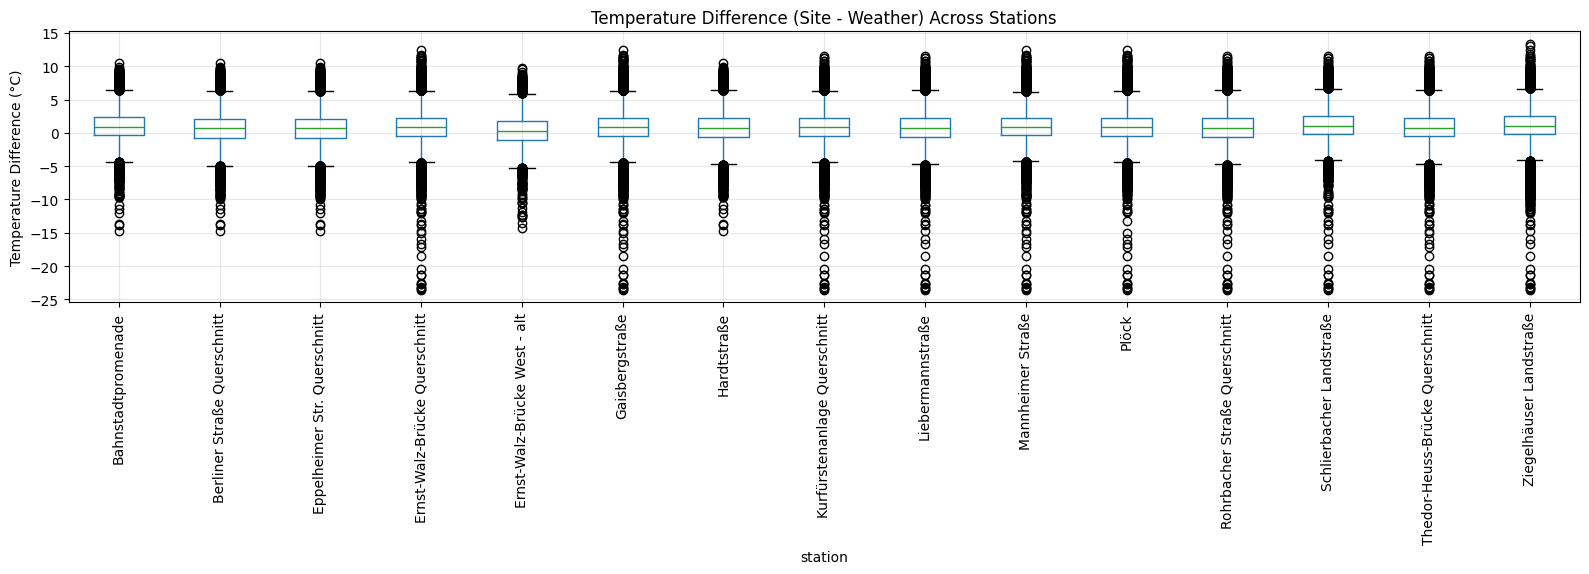

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def boxplot_temp_diff(interval=("2017-09-01", "2026-10-10")):
    rows = []
    for station in dl.get_bicyle_stations():
        df = get_temp_diff(station, interval)
        rows.append(
            pd.DataFrame({
                "station": station,
                "temp_diff": df["temp_diff"].to_list()
            })
        )

    df_all = pd.concat(rows)

    plt.figure(figsize=(14,6))
    df_all.boxplot(by="station", column="temp_diff", rot=90, figsize=(16,6))
    plt.suptitle("")
    plt.title("Temperature Difference (Site - Weather) Across Stations")
    plt.ylabel("Temperature Difference (°C)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
boxplot_temp_diff()

In [21]:
def summary_stats(interval=("2017-09-01", "2026-10-10")):
    stats = []

    for station in dl.get_bicyle_stations():
        df = get_temp_diff(station, interval)

        stats.append({
            "station": station,
            "mean_diff": float(df["temp_diff"].mean()),
            "median_diff": float(df["temp_diff"].median()),
            "std_diff": float(df["temp_diff"].std()),
            "min_diff": float(df["temp_diff"].min()),
            "max_diff": float(df["temp_diff"].max()),
        })

    return pl.DataFrame(stats)

stats_df = summary_stats()
stats_df


station,mean_diff,median_diff,std_diff,min_diff,max_diff
str,f64,f64,f64,f64,f64
"""Ziegelhäuser Landstraße""",1.223495,1.1,2.379814,-23.6,13.4
"""Bahnstadtpromenade""",1.077617,0.9,2.255409,-14.8,10.5
"""Berliner Straße Querschnitt""",0.756926,0.7,2.33144,-14.8,10.5
"""Gaisbergstraße""",0.954838,0.9,2.336907,-23.6,12.4
"""Eppelheimer Str. Querschnitt""",0.728942,0.7,2.334138,-14.8,10.5
…,…,…,…,…,…
"""Thedor-Heuss-Brücke Querschnit…",0.876533,0.8,2.378179,-23.6,11.5
"""Hardtstraße""",0.847625,0.8,2.353229,-14.8,10.5
"""Rohrbacher Straße Querschnitt""",0.850924,0.8,2.363189,-23.6,11.5


### Compare percipation between datasets

In [25]:
import polars as pl

def get_precip_diff(station, interval=("2017-09-01", "2026-10-10")):
    df = dl.get_bicycle_with_weather(station, interval=interval)

    df = df.with_columns([
        (pl.col("site_rain_accumulation") - pl.col("rain")).alias("rain_diff"),
        (pl.col("site_snow_accumulation") - pl.col("snowfall")).alias("snow_diff")
    ])

    return df

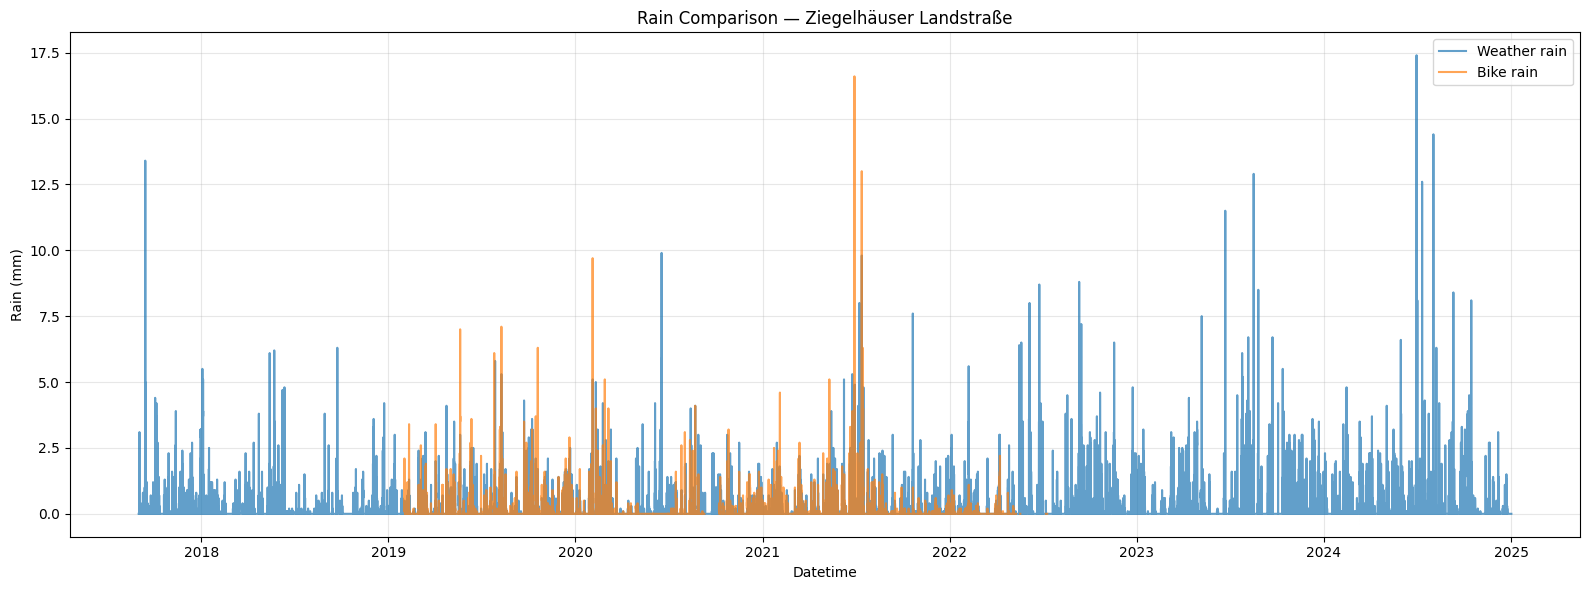

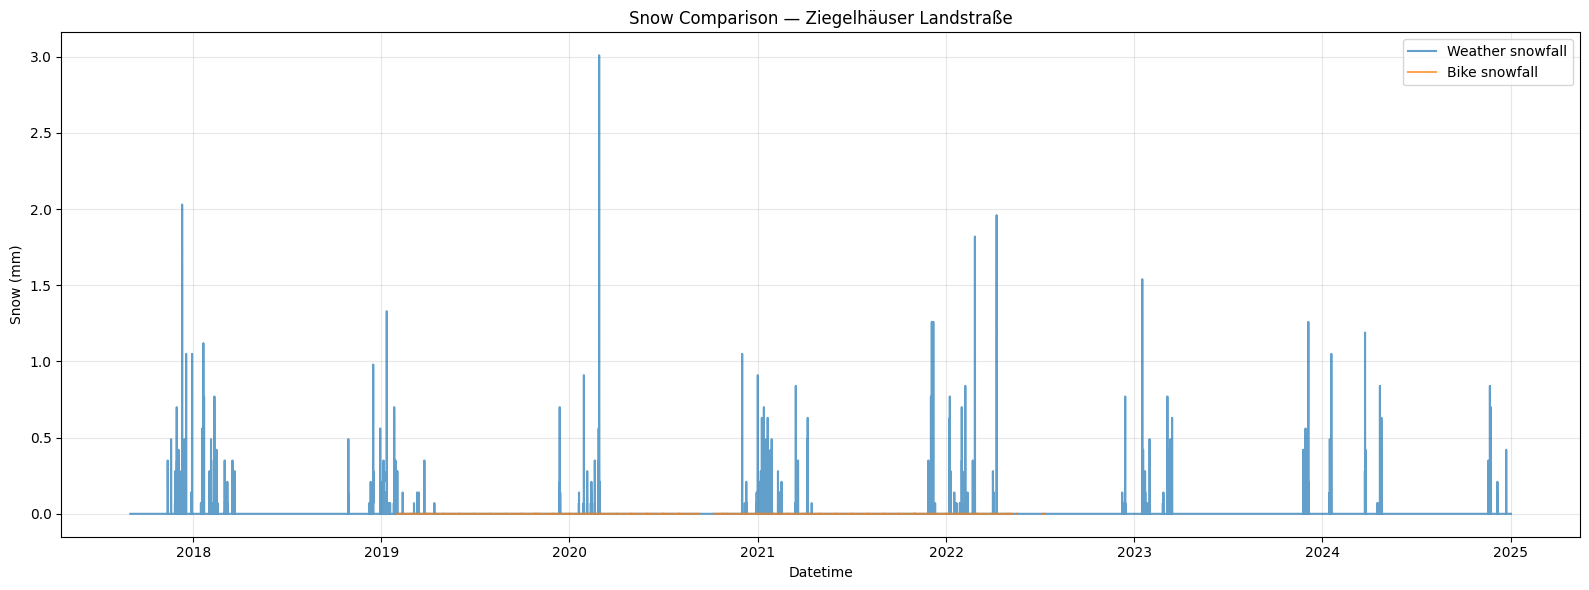

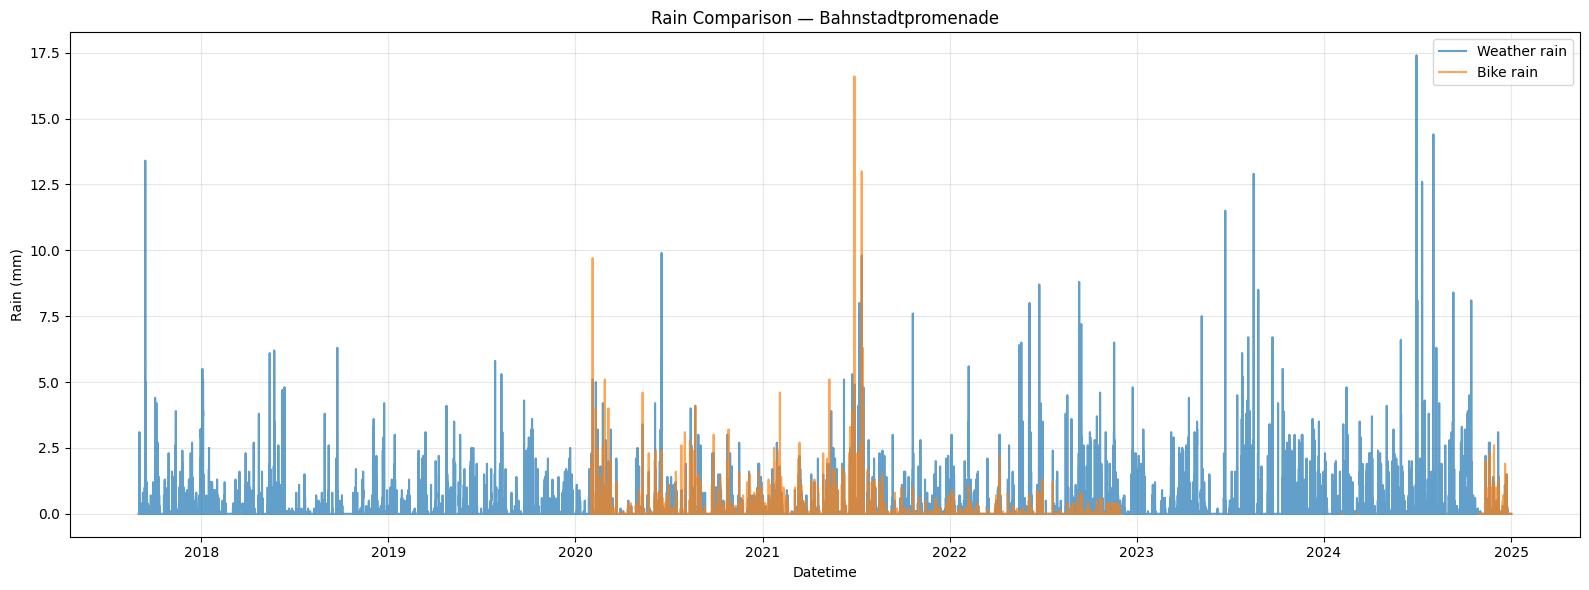

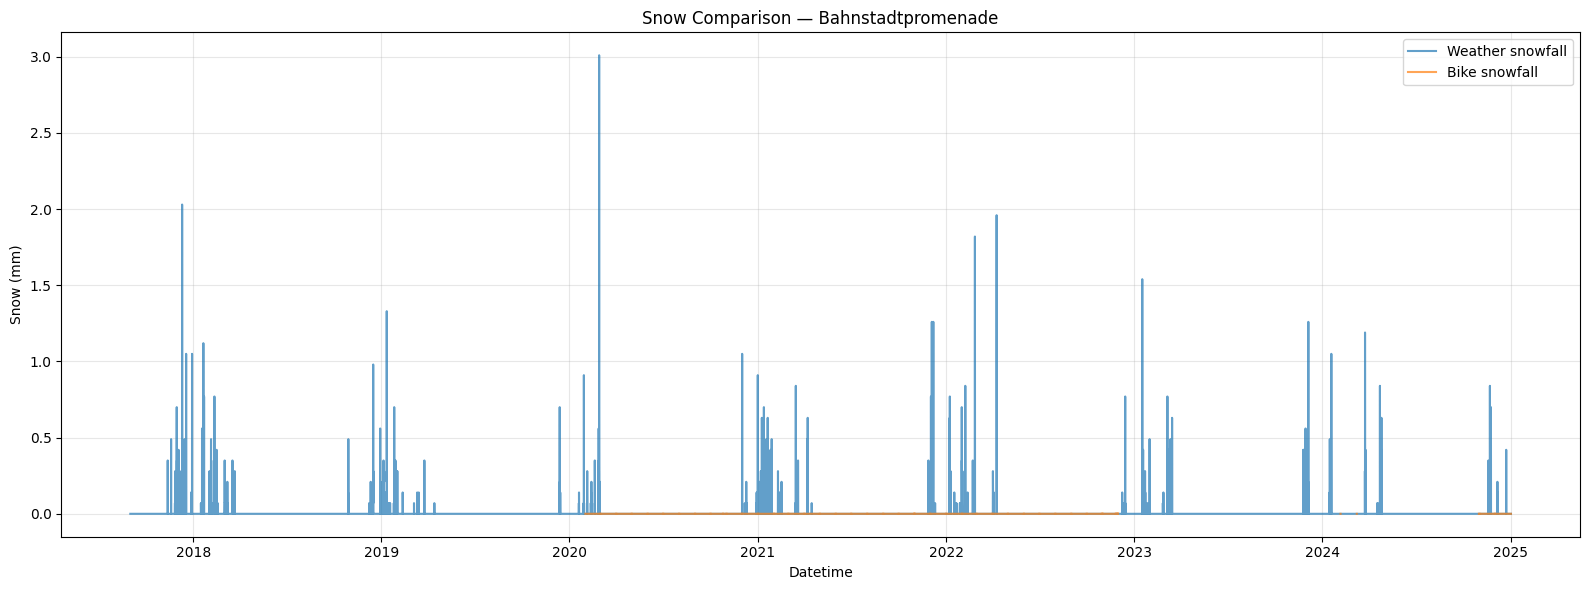

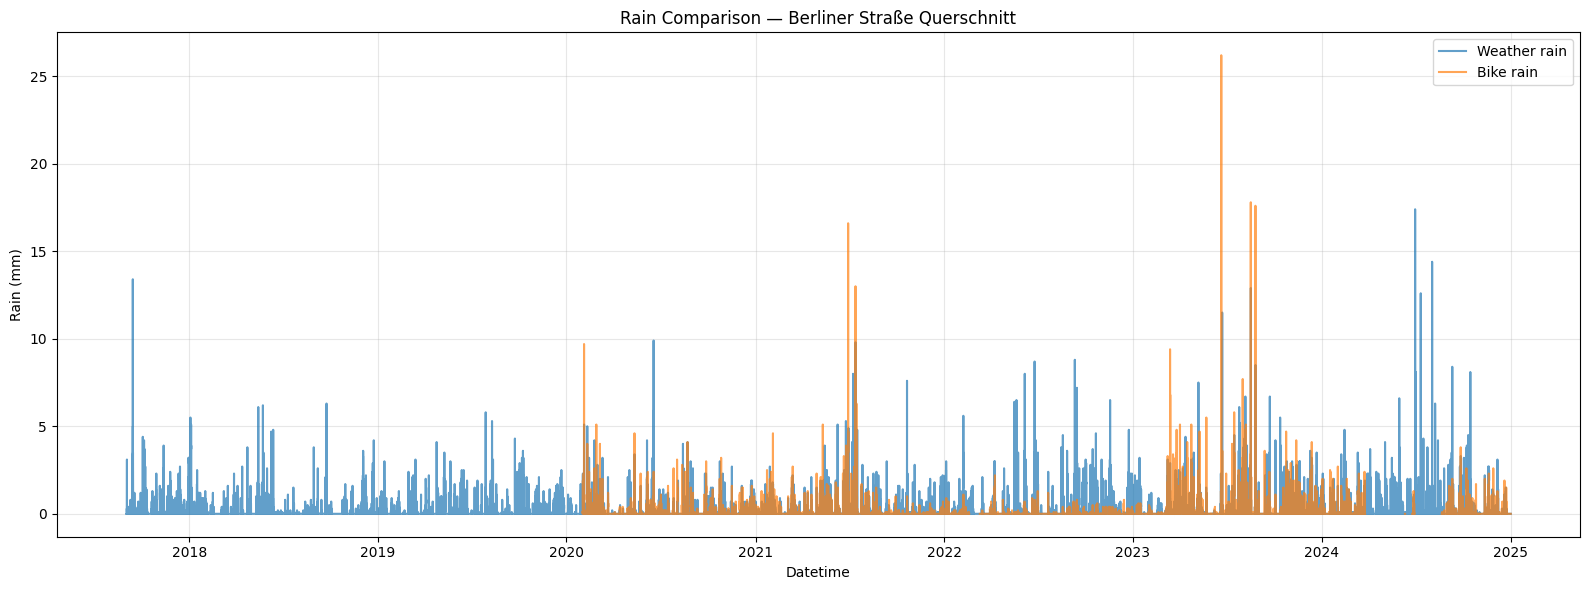

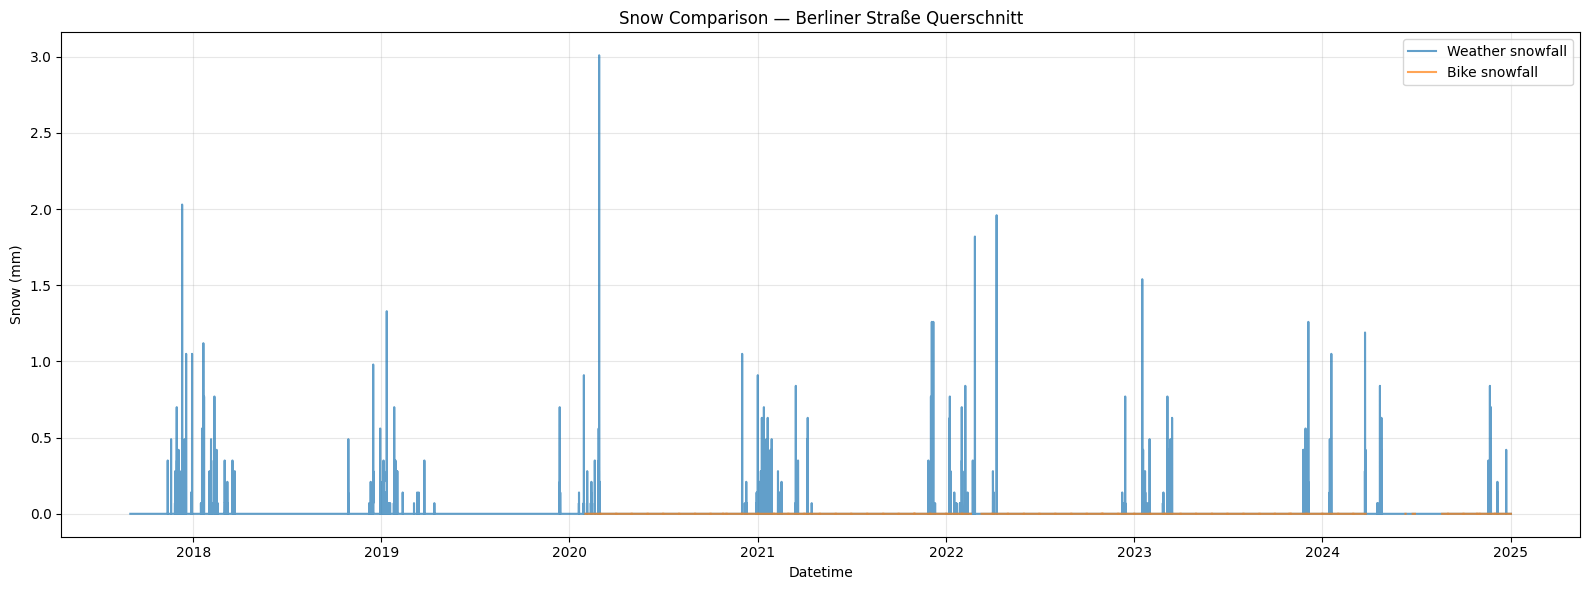

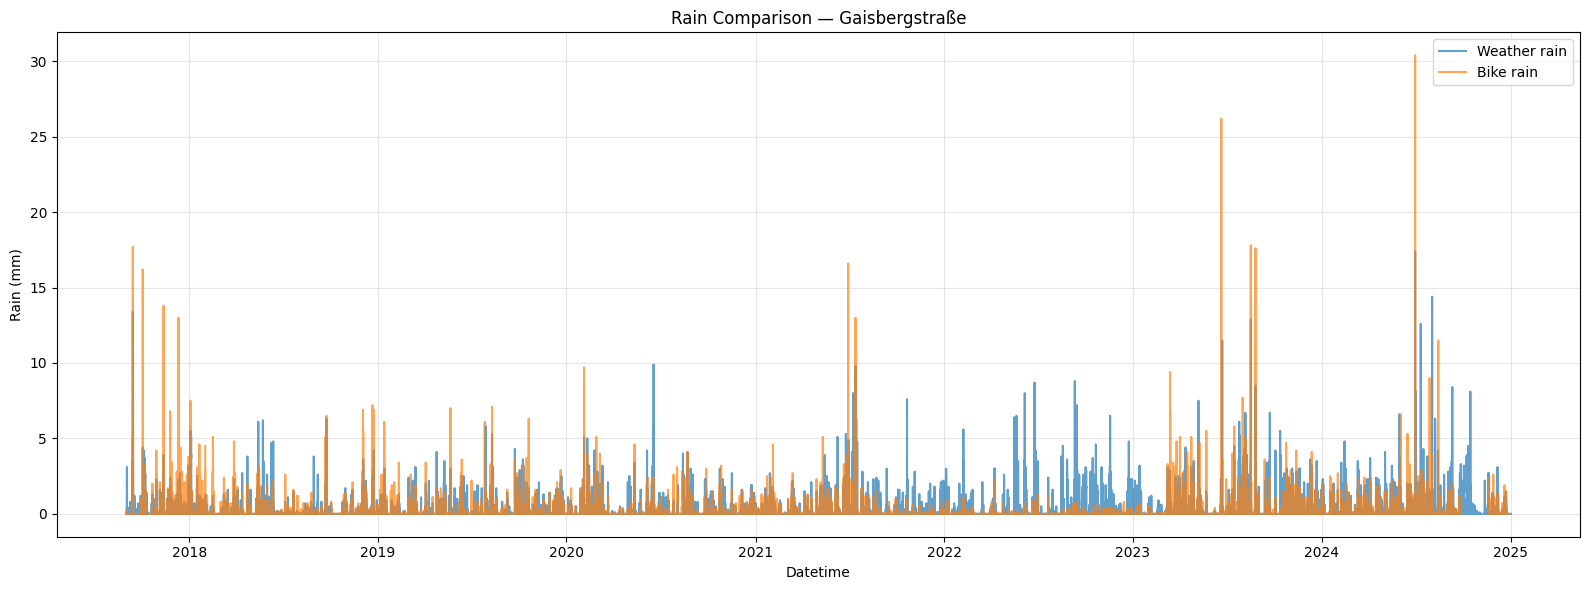

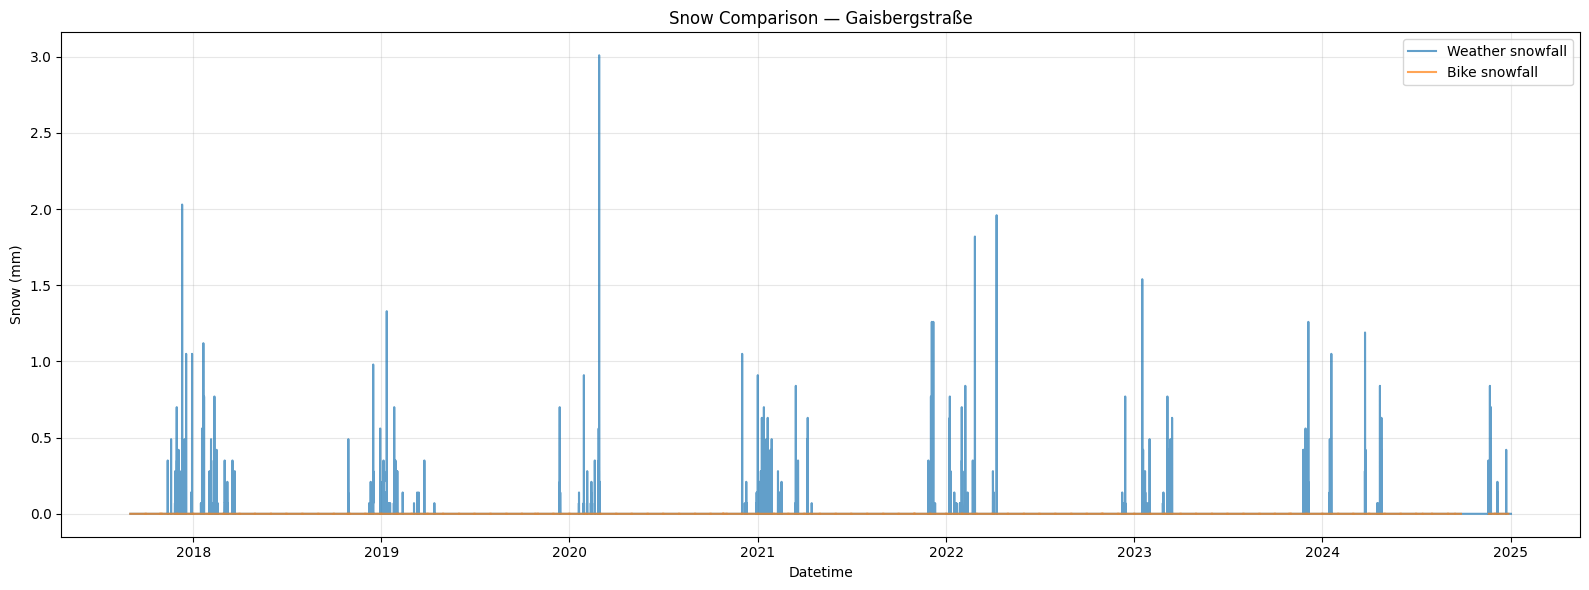

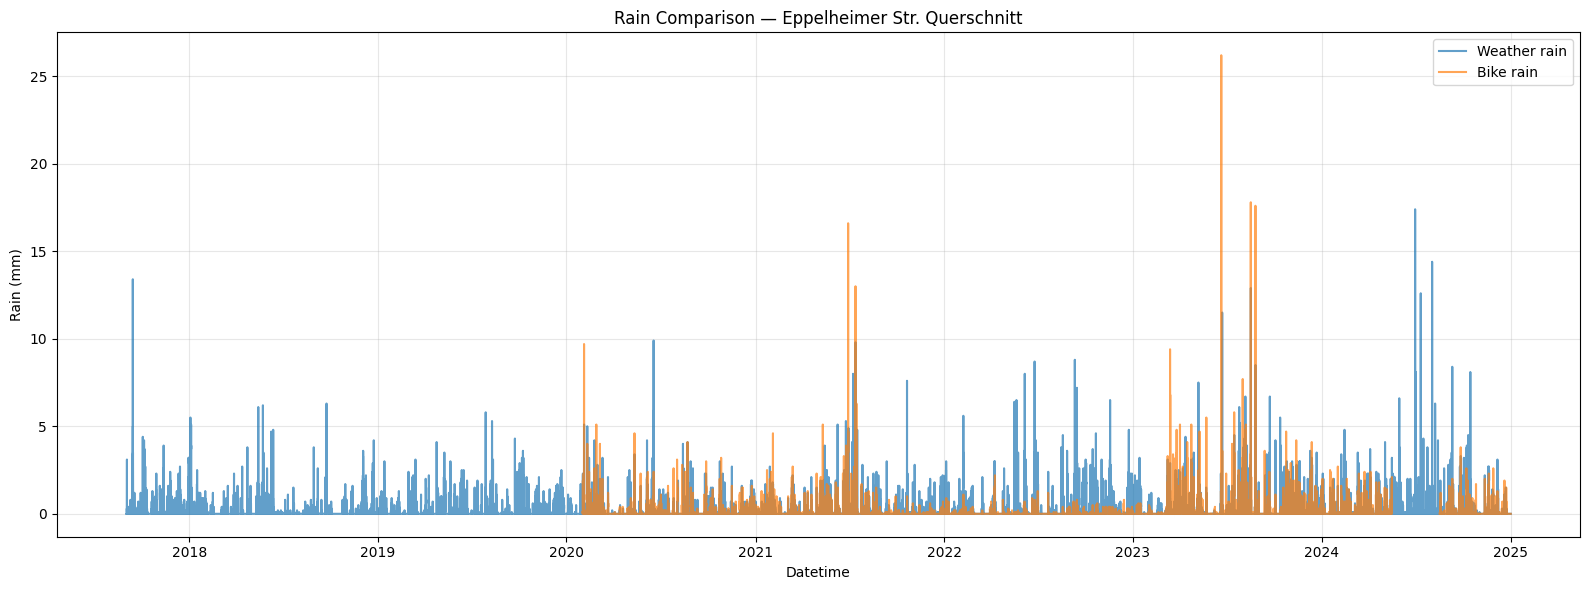

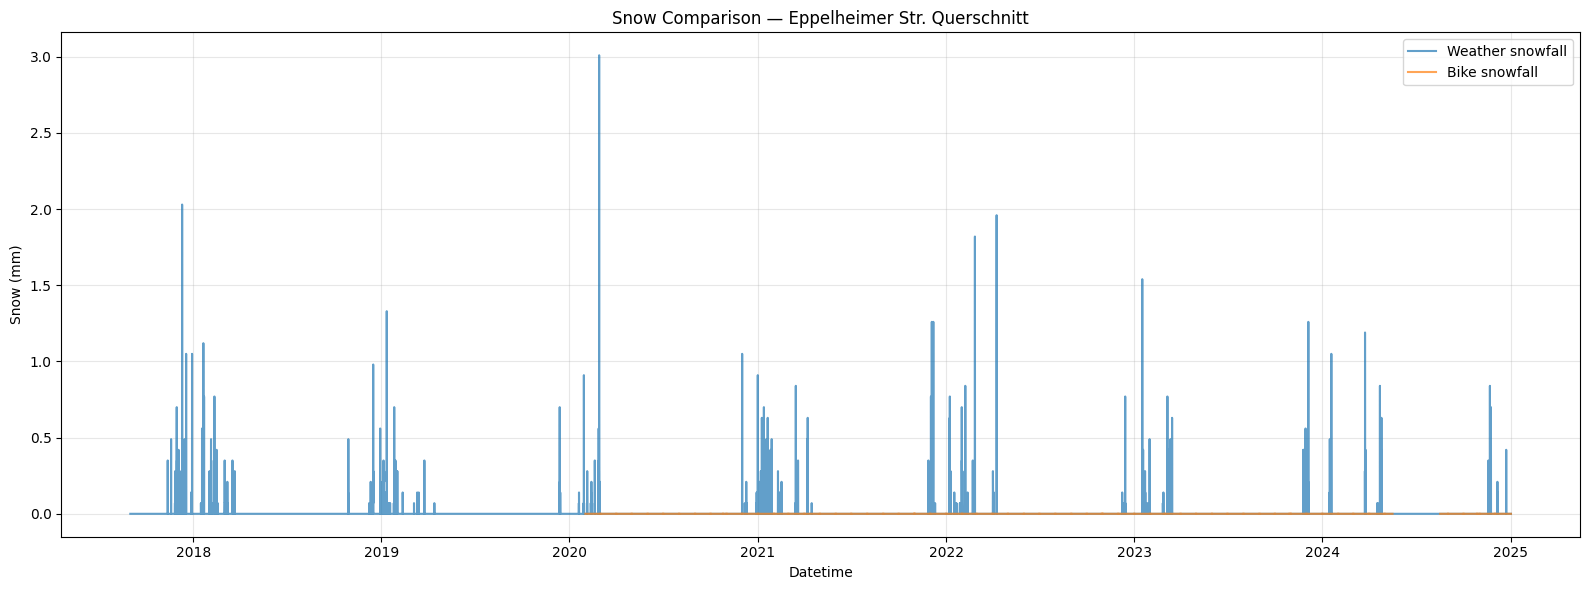

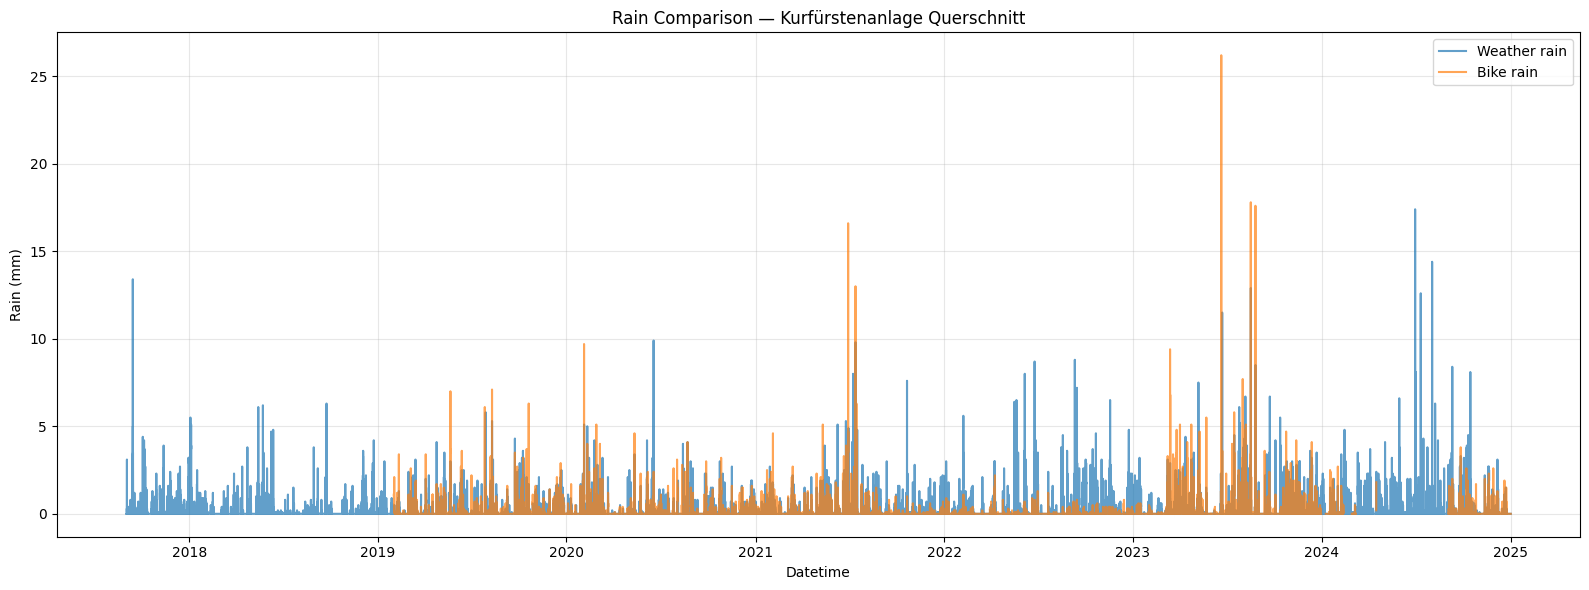

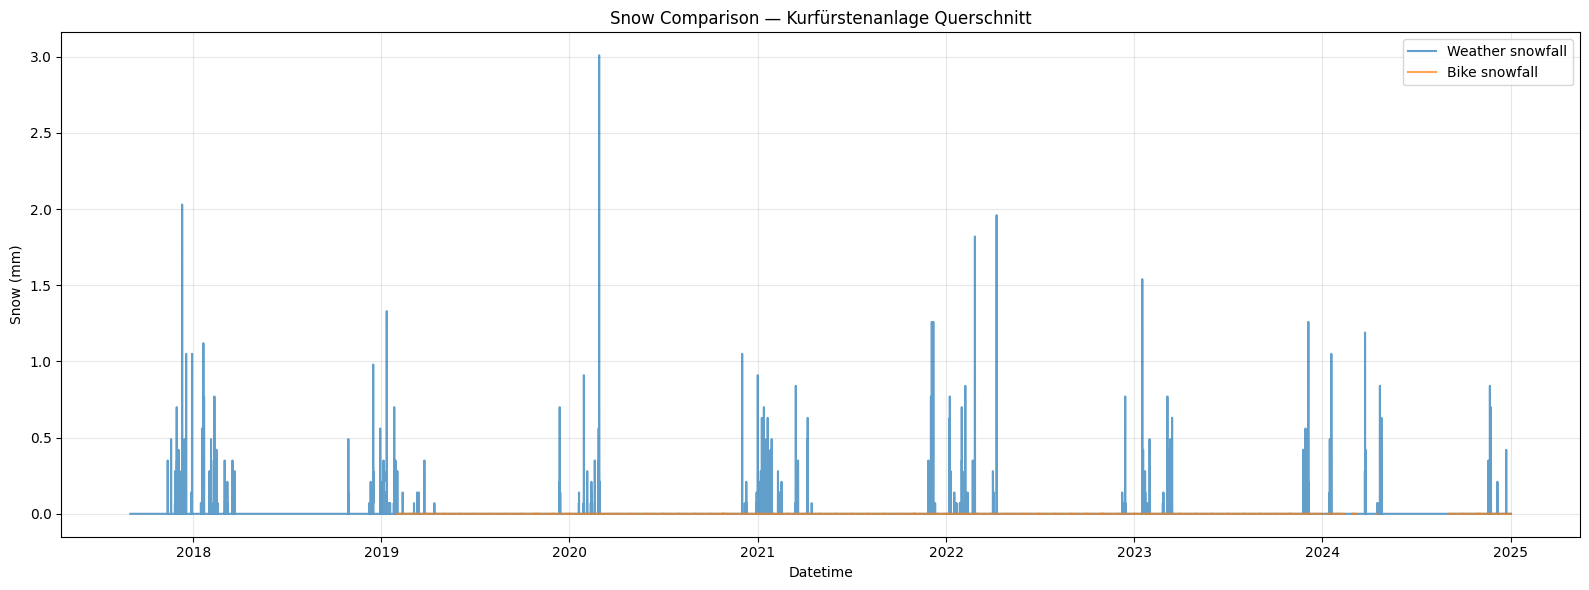

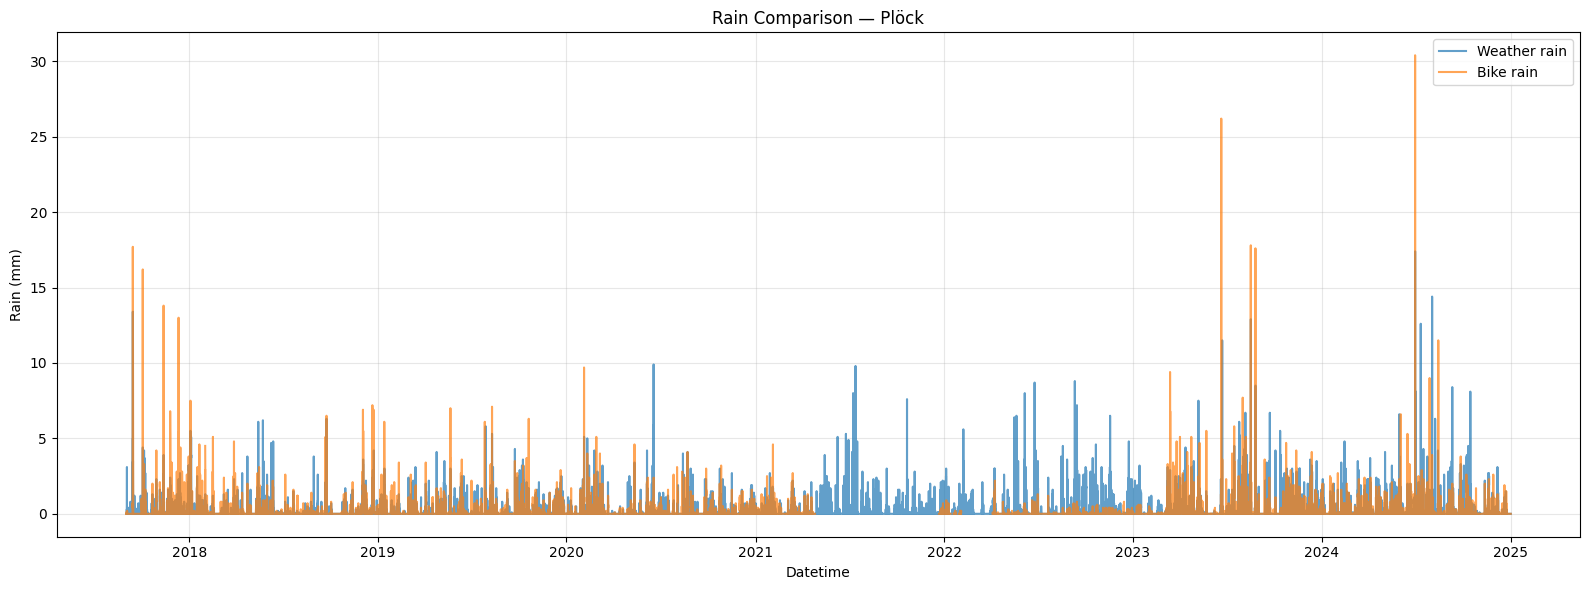

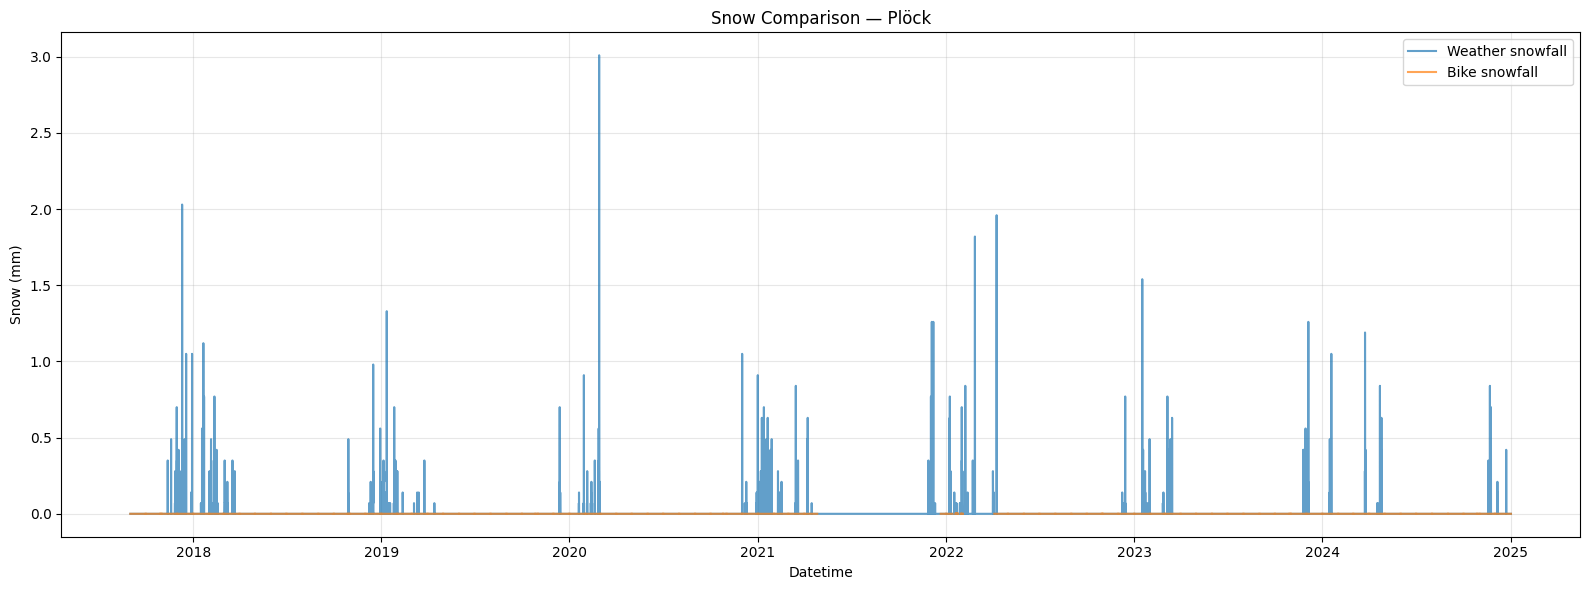

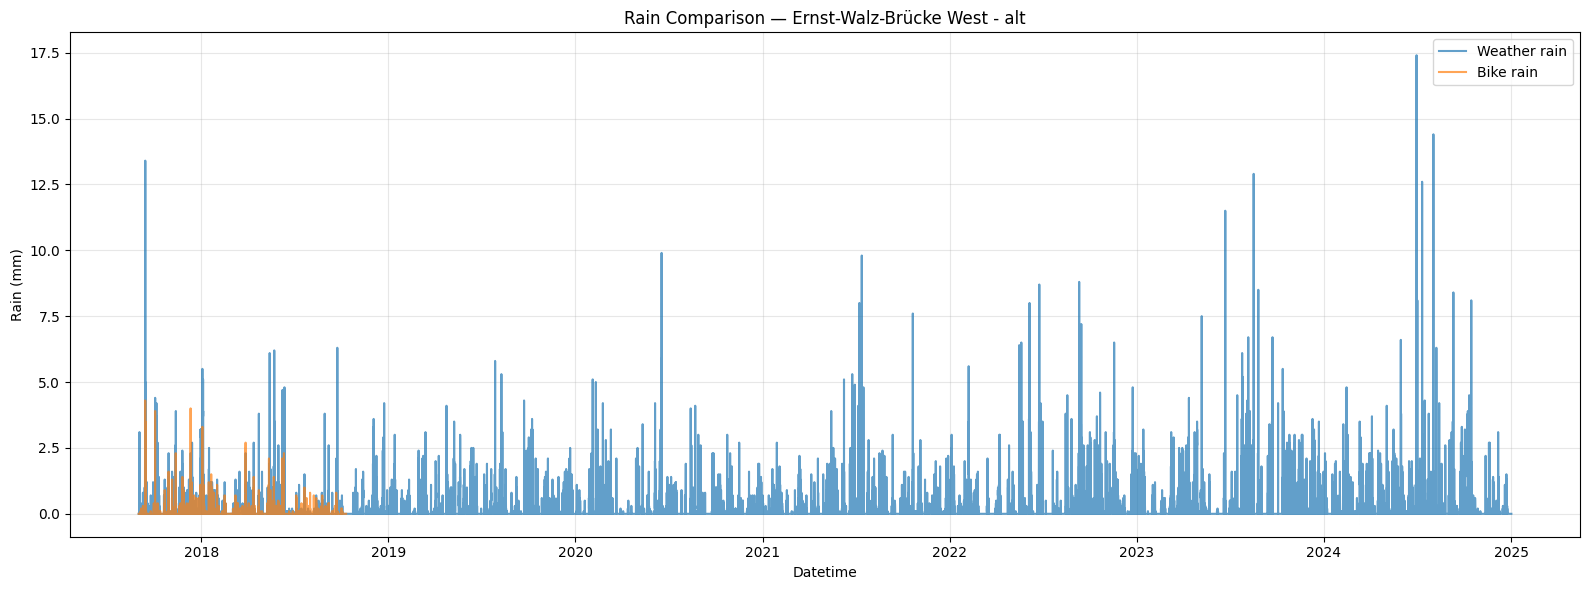

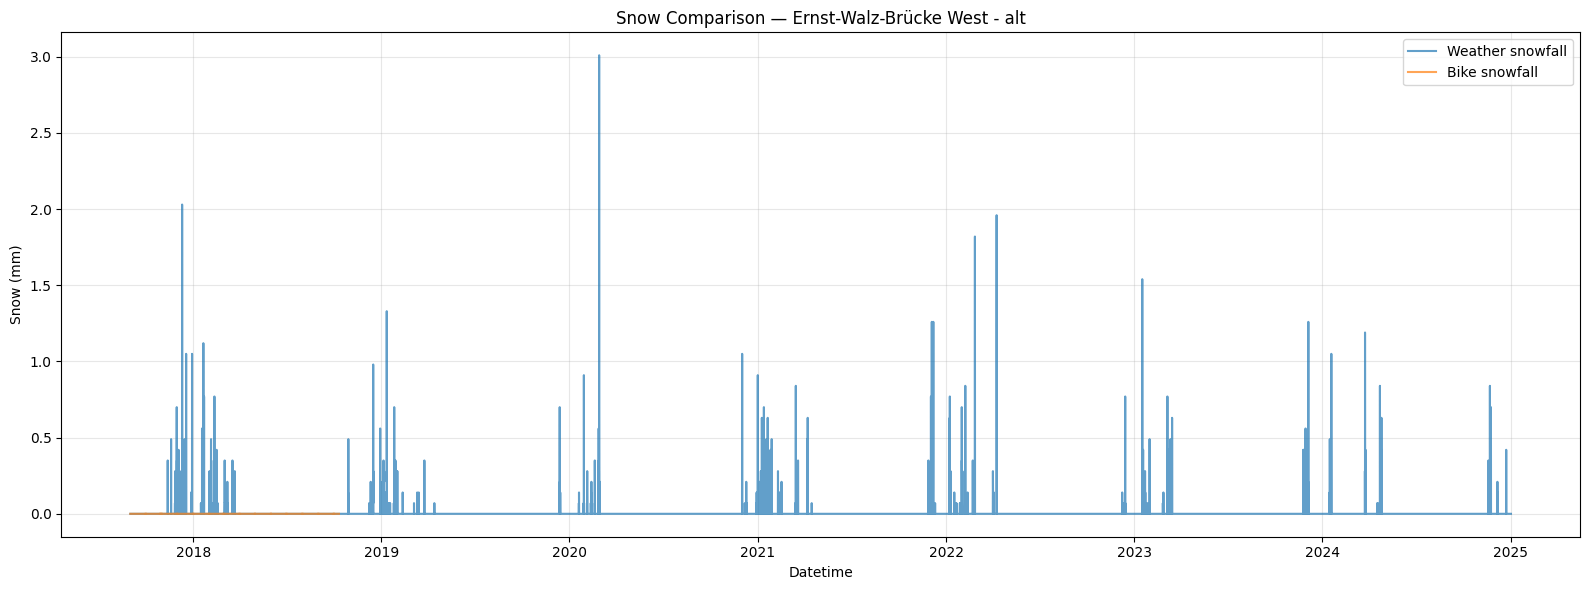

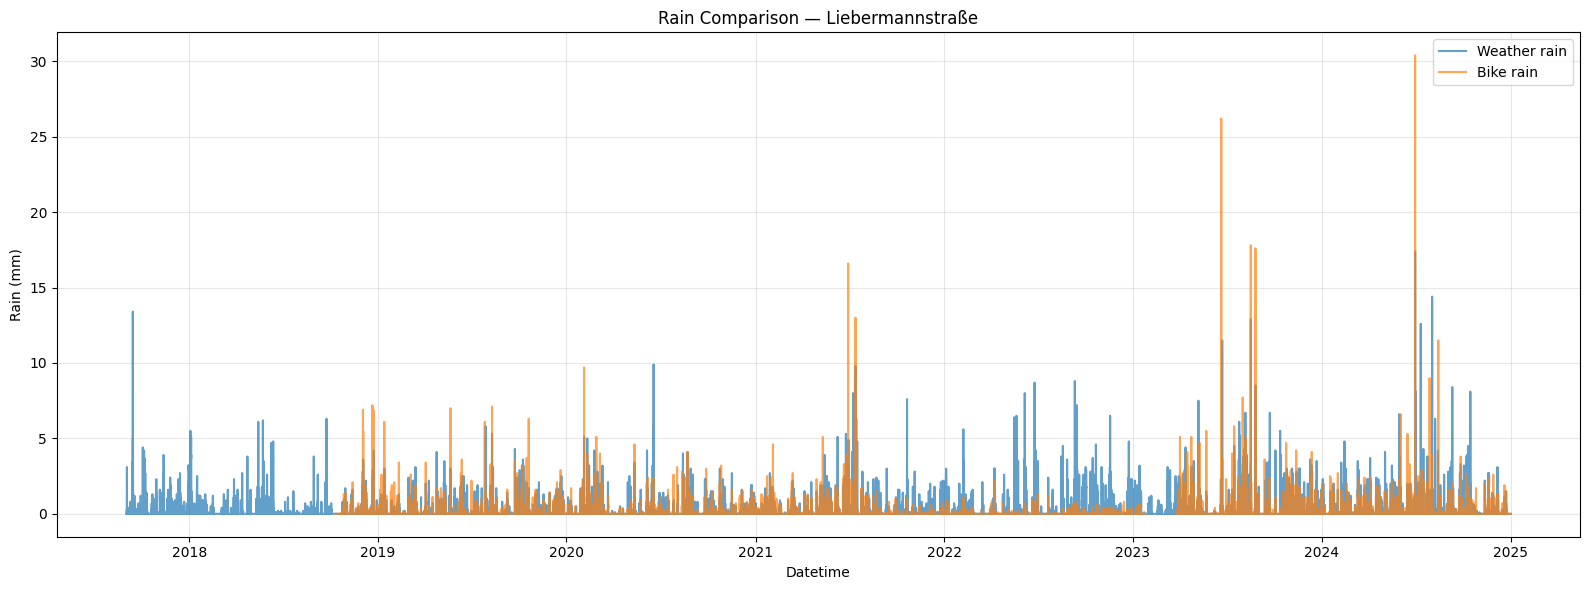

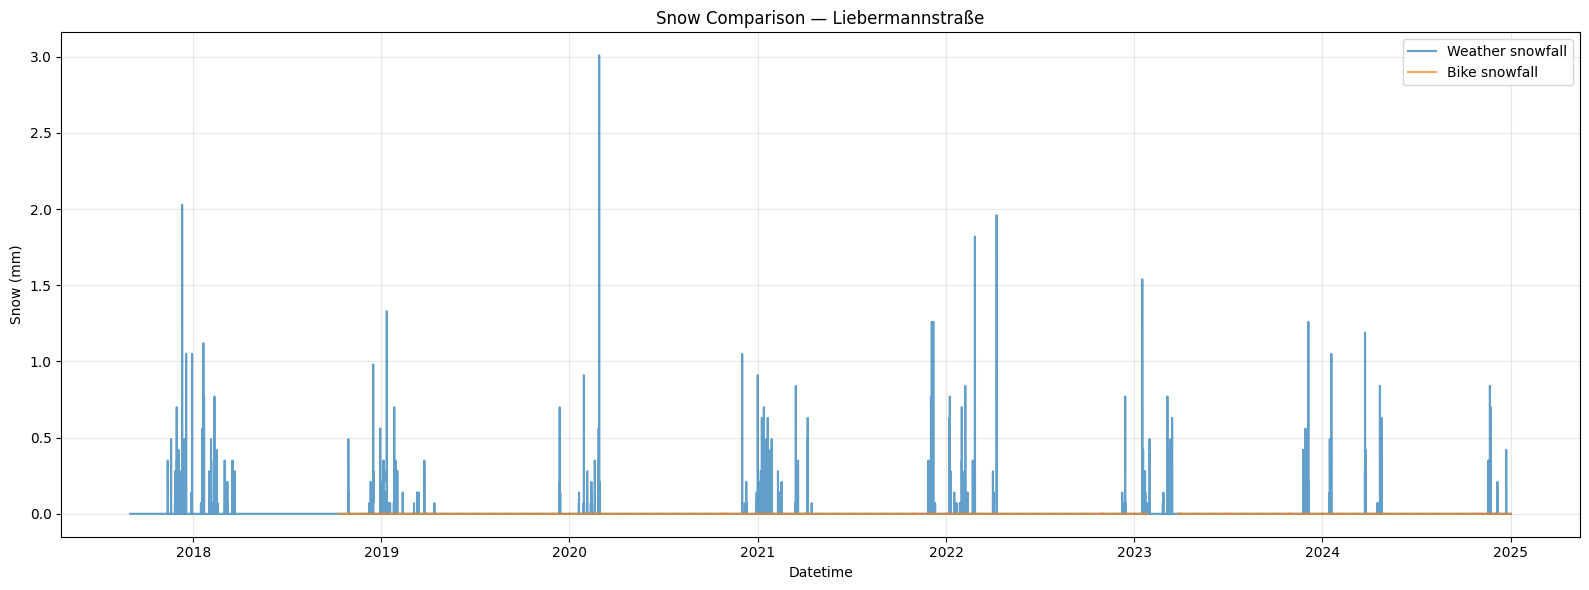

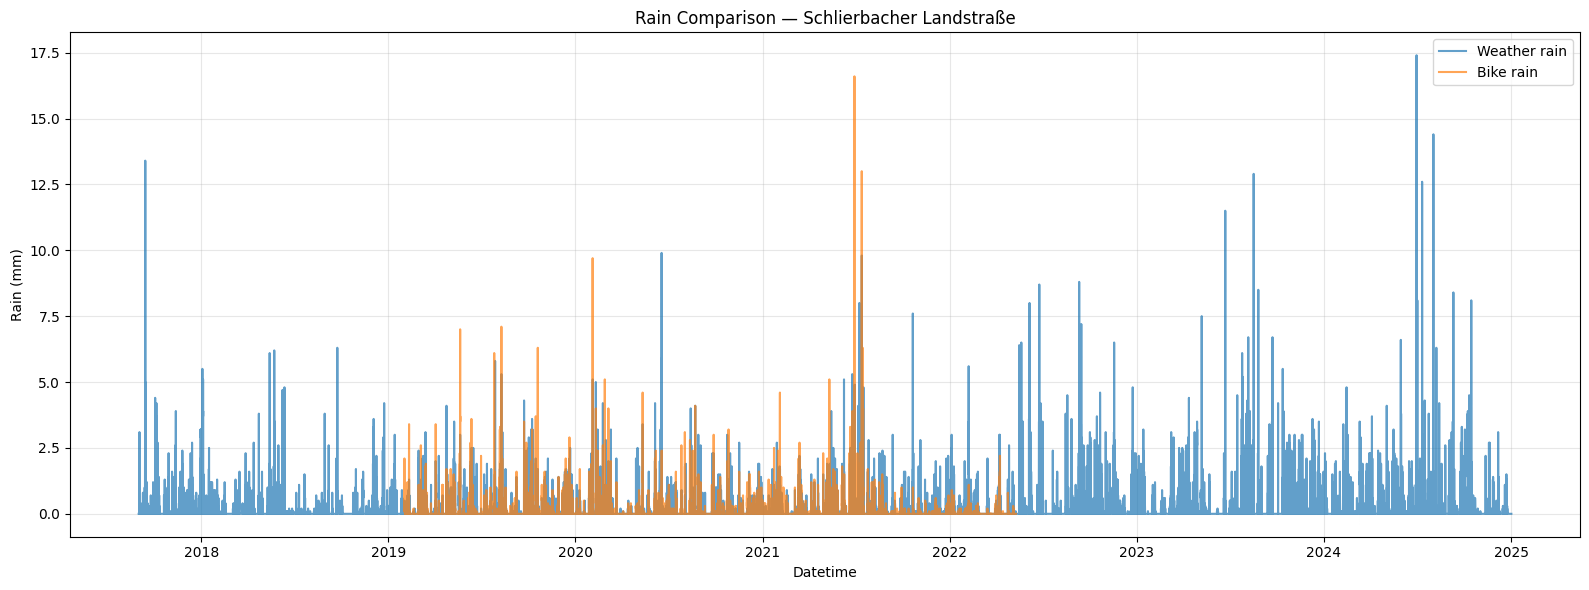

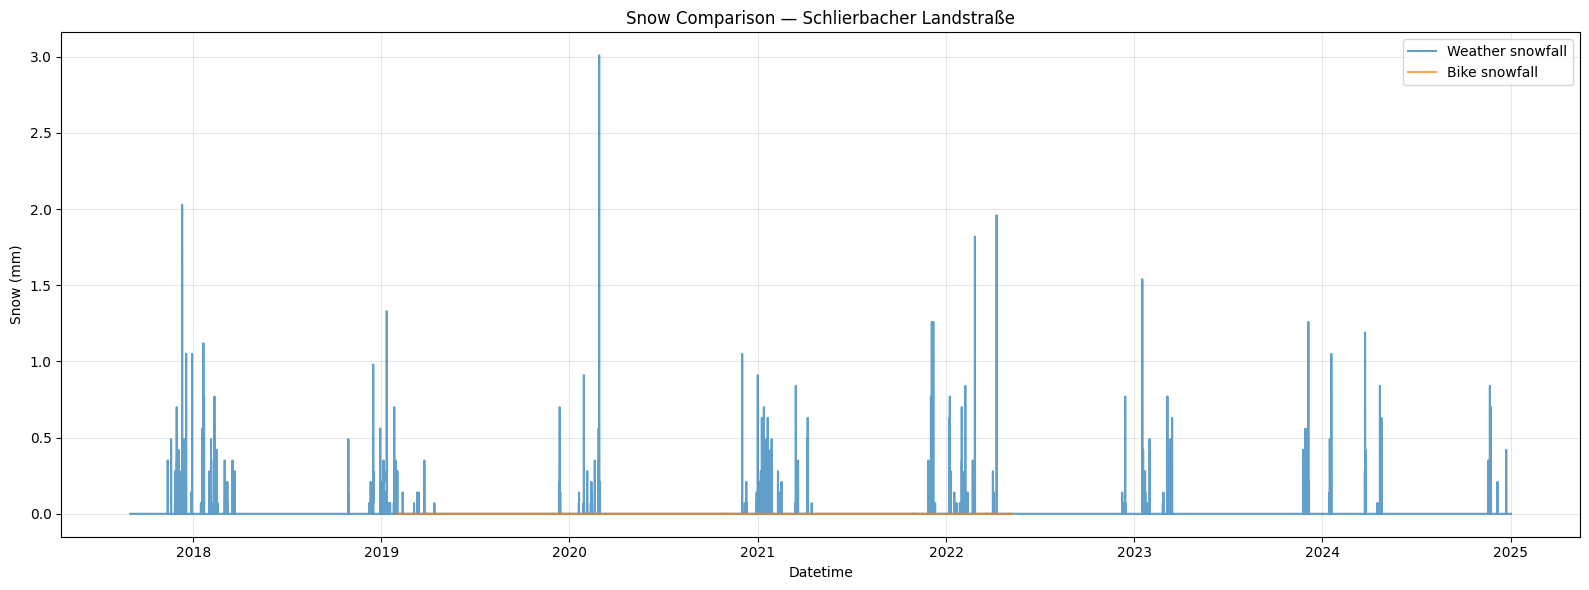

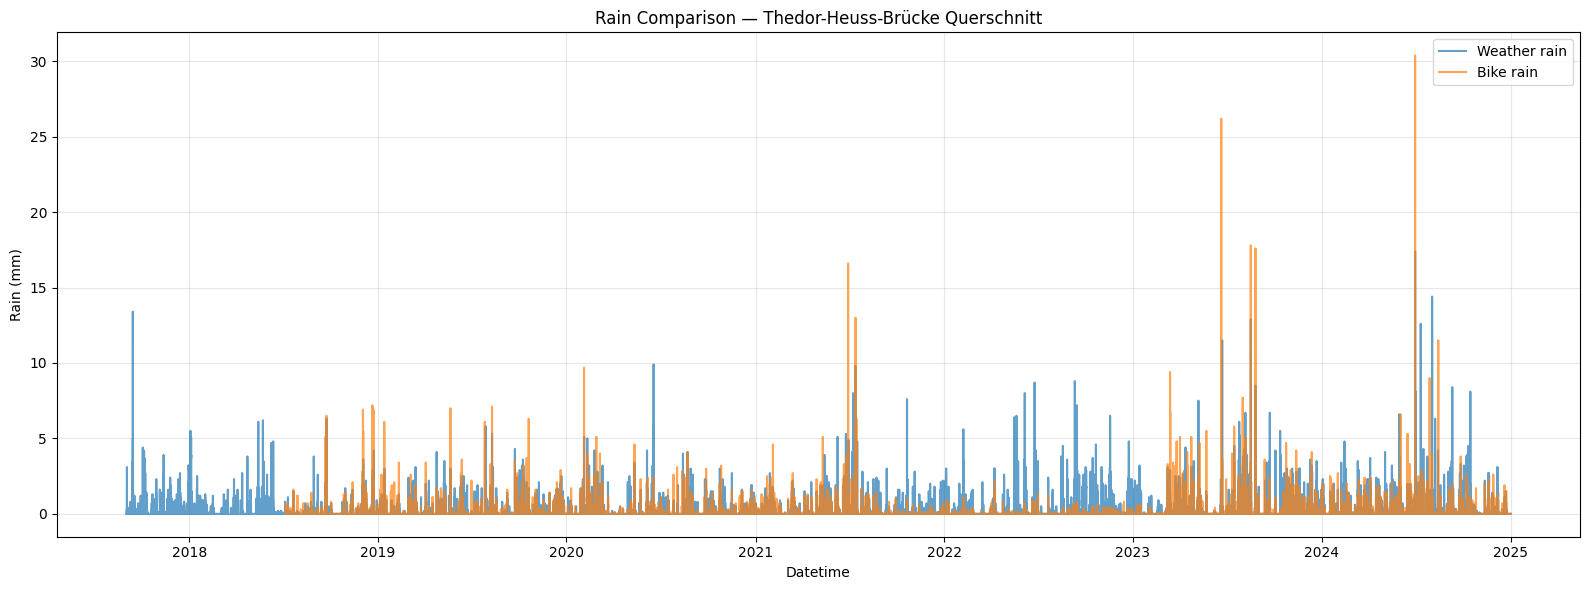

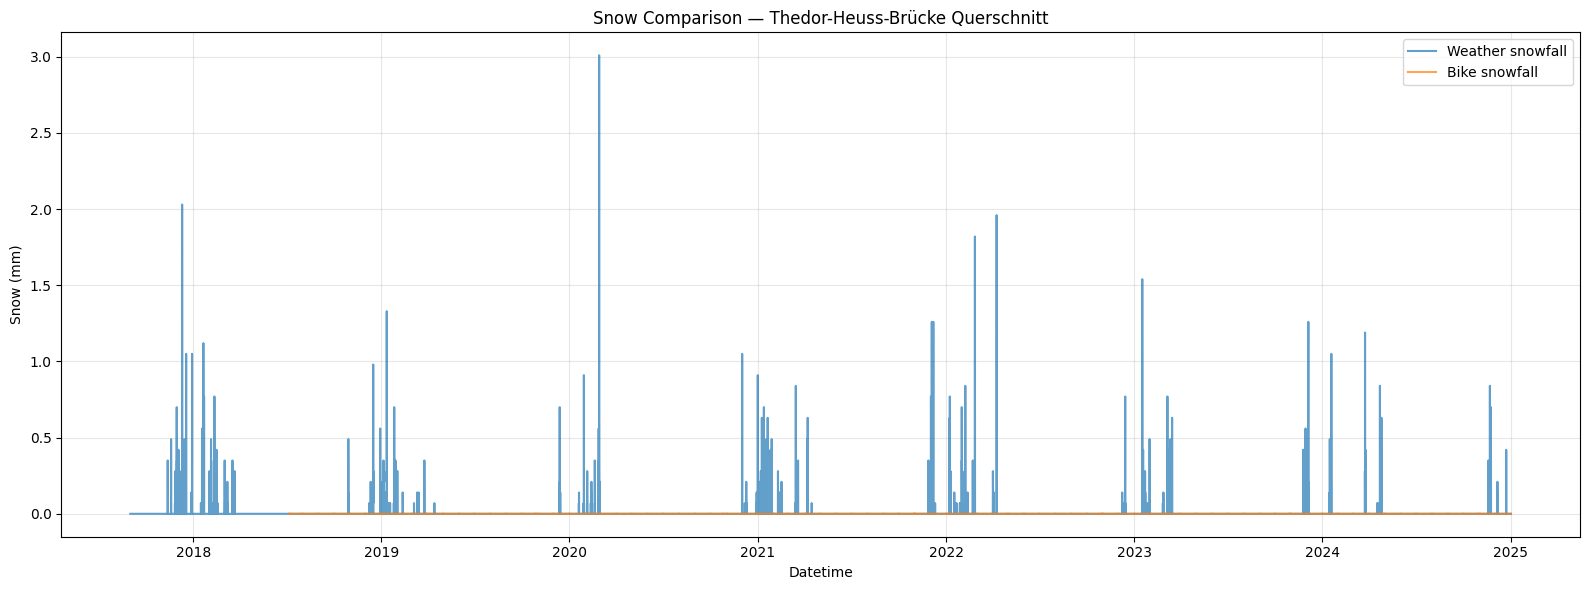

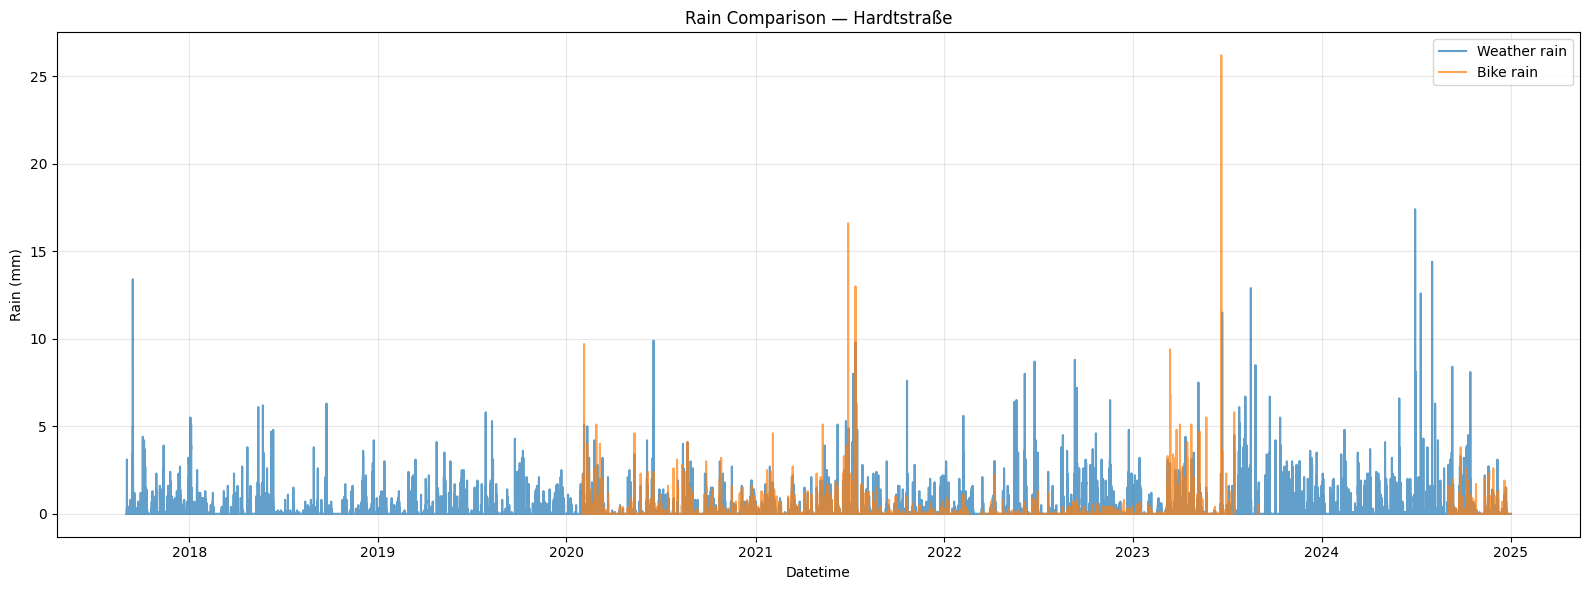

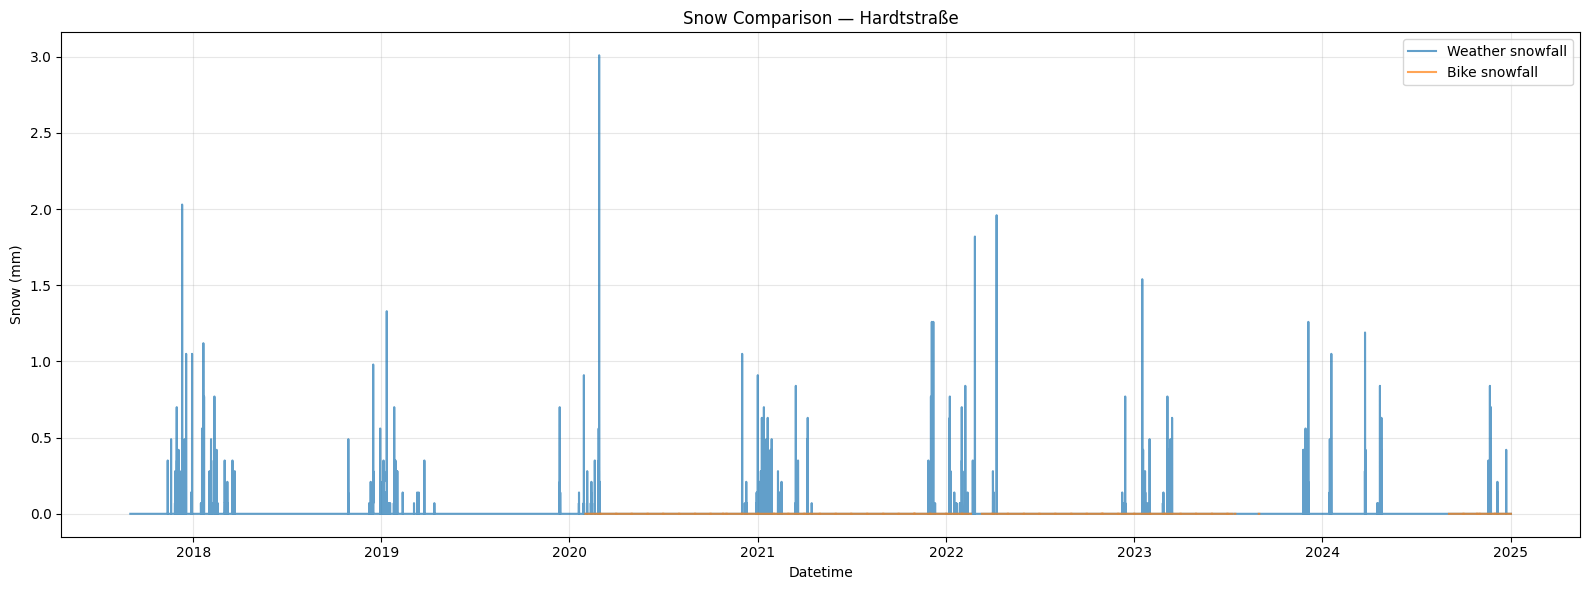

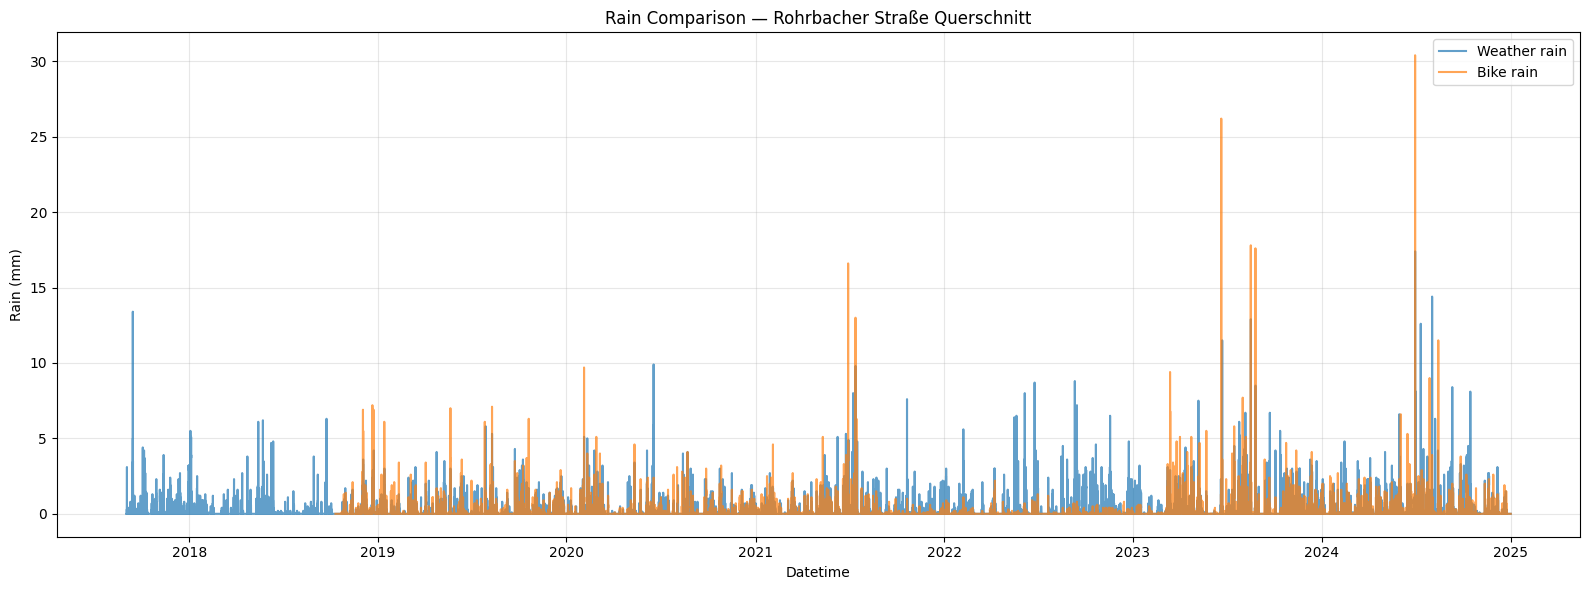

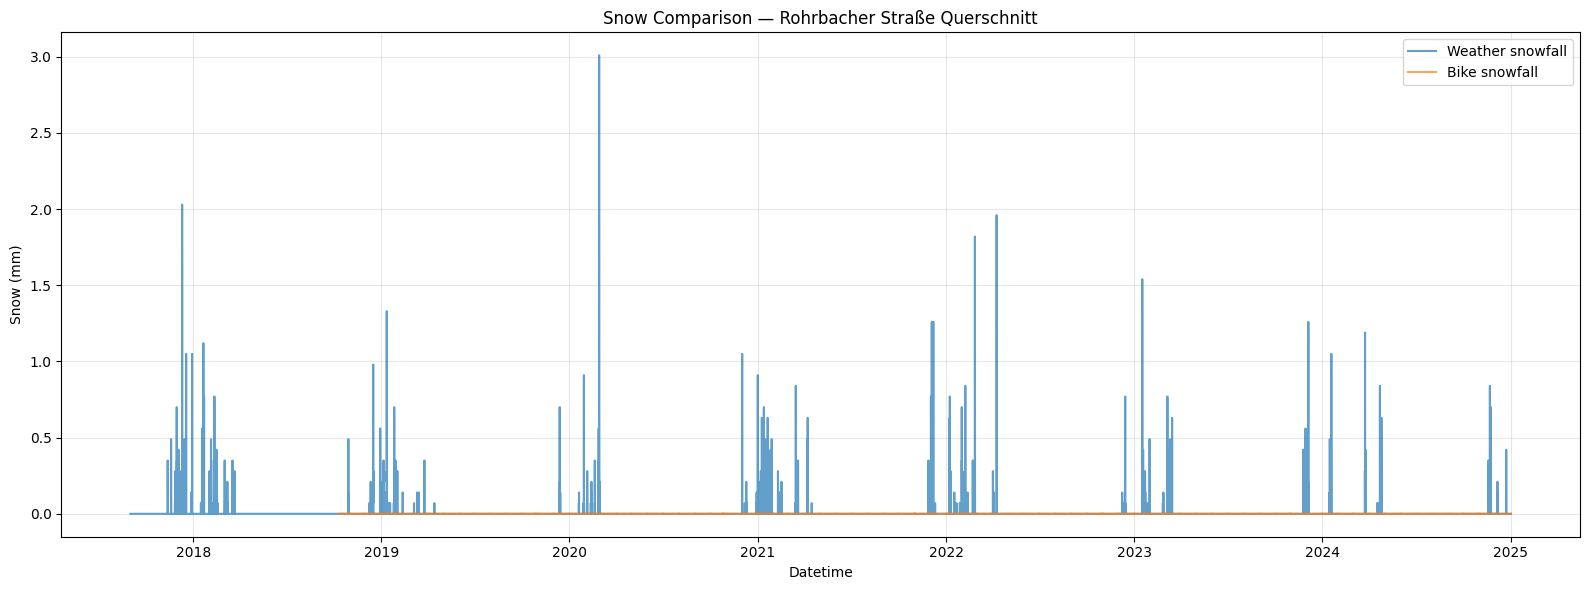

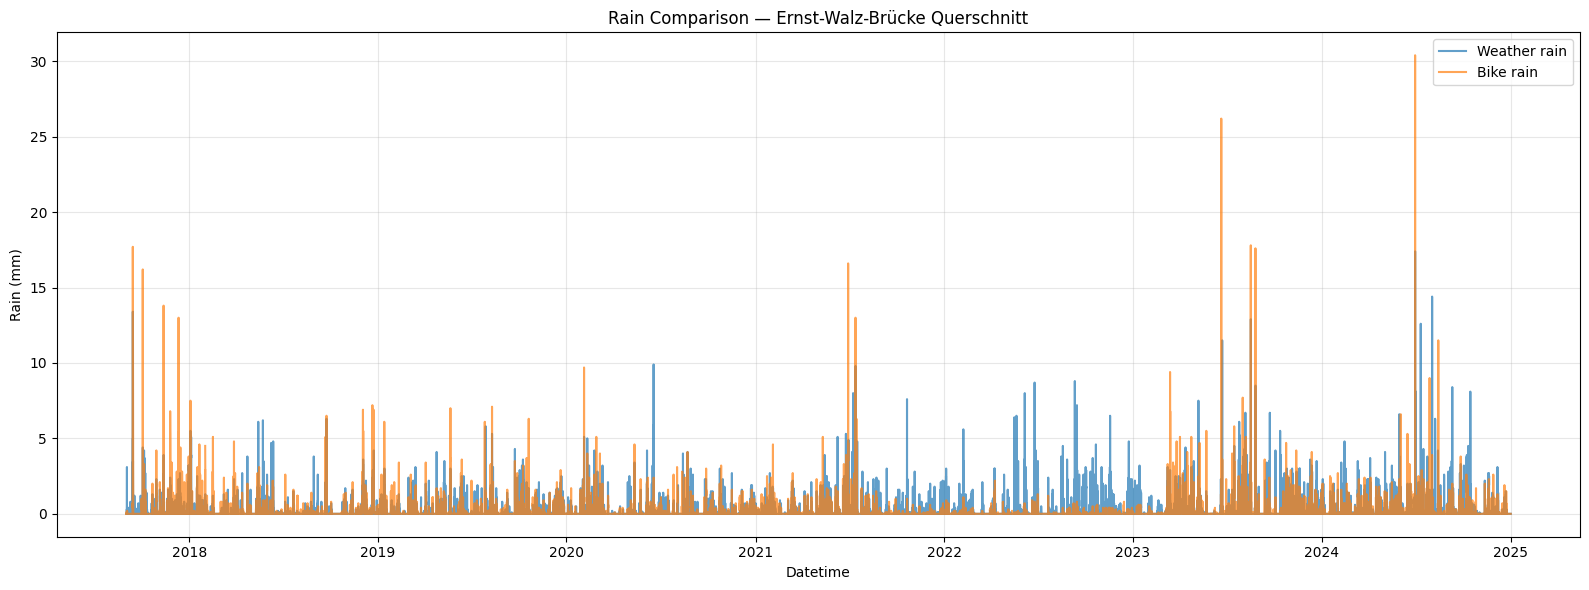

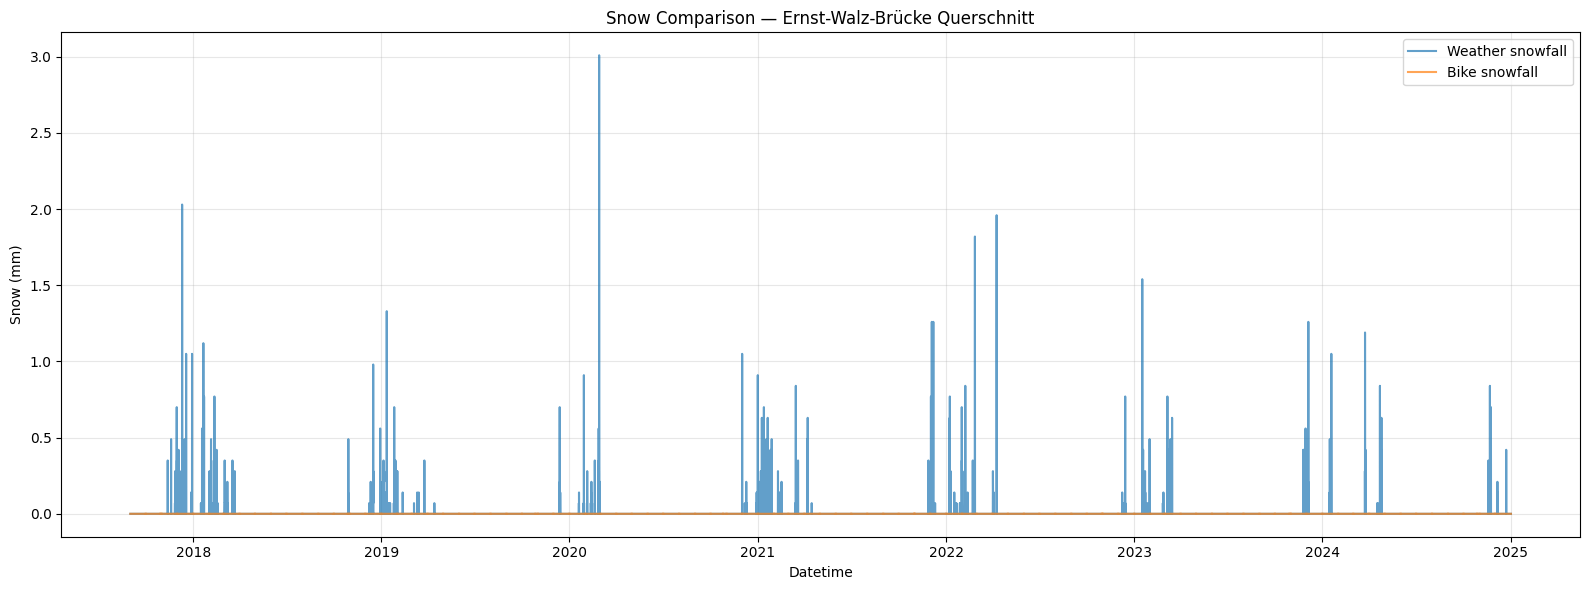

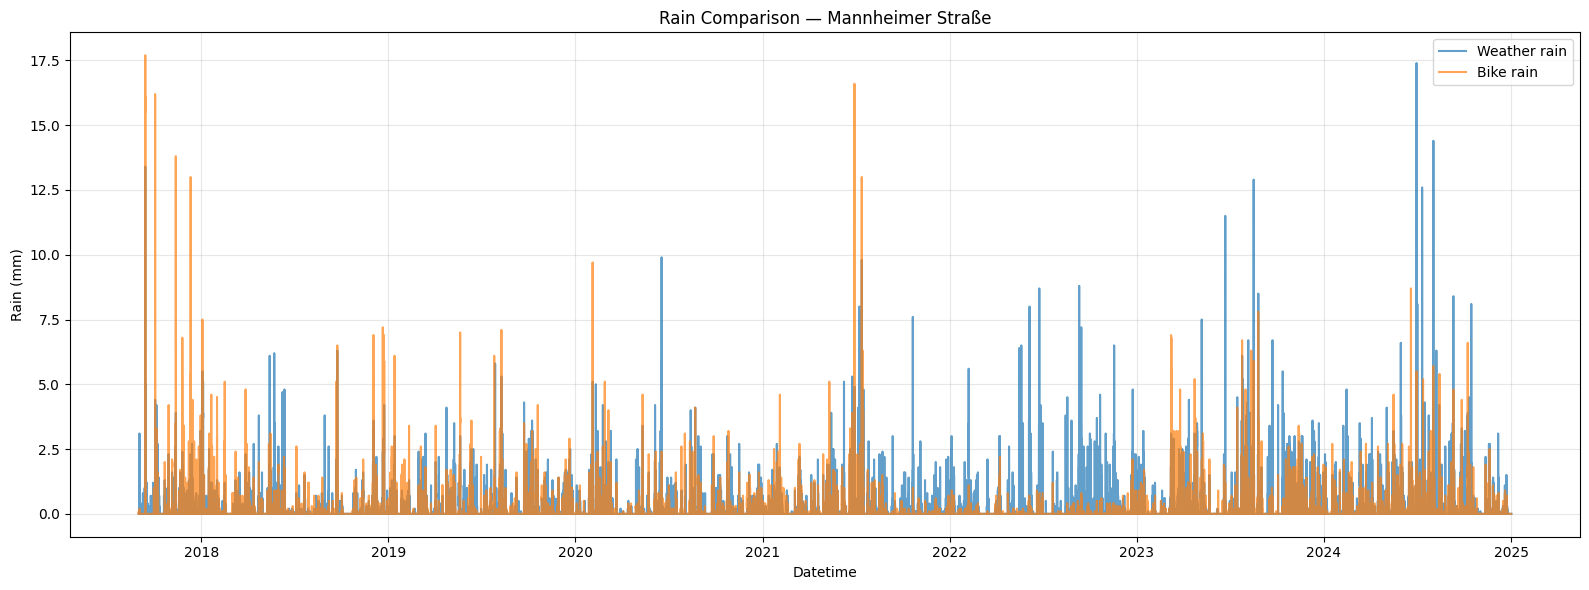

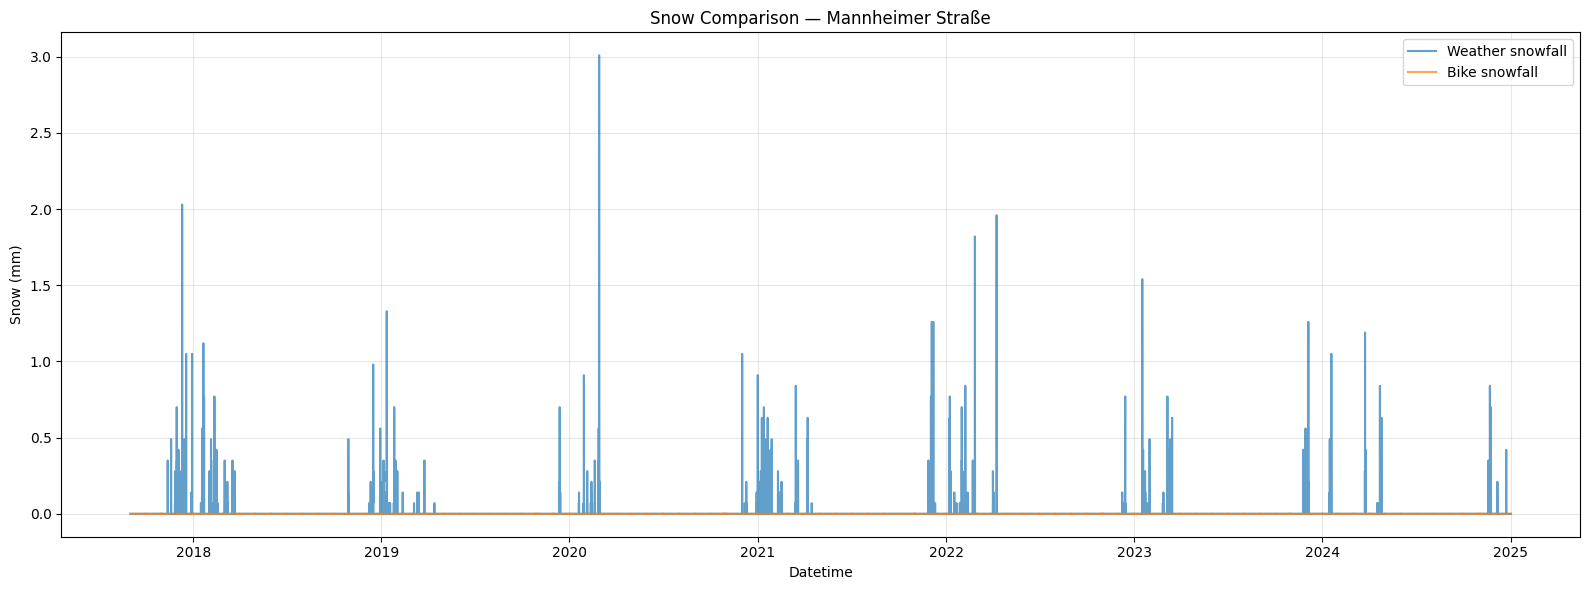

In [28]:
import matplotlib.pyplot as plt

def plot_precip_comparison(interval=("2017-09-01", "2026-10-10")):
    for station in dl.get_bicyle_stations():

        df = get_precip_diff(station, interval)

        plt.figure(figsize=(16,6))

        plt.plot(df["datetime"], df["rain"], label="Weather rain", alpha=0.7)
        plt.plot(df["datetime"], df["site_rain_accumulation"], label="Bike rain", alpha=0.7)

        plt.title(f"Rain Comparison — {station}")
        plt.xlabel("Datetime")
        plt.ylabel("Rain (mm)")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(16,6))

        plt.plot(df["datetime"], df["snowfall"], label="Weather snowfall", alpha=0.7)
        plt.plot(df["datetime"], df["site_snow_accumulation"], label="Bike snowfall", alpha=0.7)

        plt.title(f"Snow Comparison — {station}")
        plt.xlabel("Datetime")
        plt.ylabel("Snow (mm)")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
plot_precip_comparison()

<Figure size 1600x600 with 0 Axes>

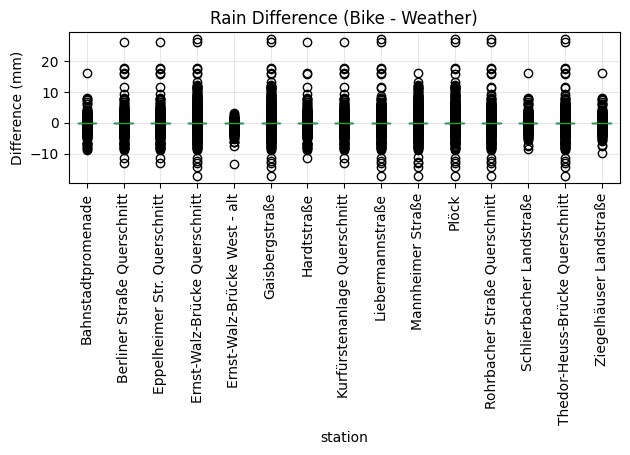

<Figure size 1600x600 with 0 Axes>

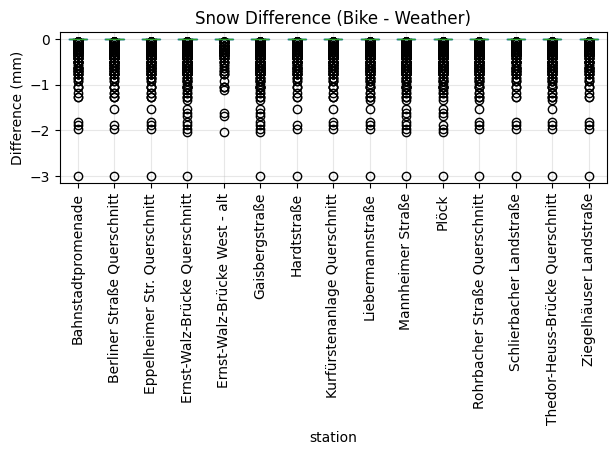

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def boxplot_precip_diff(interval=("2017-09-01", "2026-10-10")):
    rows_rain = []
    rows_snow = []

    for station in dl.get_bicyle_stations():
        df = get_precip_diff(station, interval)

        rows_rain.append(pd.DataFrame({
            "station": station,
            "rain_diff": df["rain_diff"].to_list()
        }))

        rows_snow.append(pd.DataFrame({
            "station": station,
            "snow_diff": df["snow_diff"].to_list()
        }))

    df_rain = pd.concat(rows_rain)
    df_snow = pd.concat(rows_snow)

    # Rain
    plt.figure(figsize=(16,6))
    df_rain.boxplot(by="station", column="rain_diff", rot=90)
    plt.suptitle("")
    plt.title("Rain Difference (Bike - Weather)")
    plt.ylabel("Difference (mm)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Snow
    plt.figure(figsize=(16,6))
    df_snow.boxplot(by="station", column="snow_diff", rot=90)
    plt.suptitle("")
    plt.title("Snow Difference (Bike - Weather)")
    plt.ylabel("Difference (mm)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
boxplot_precip_diff()